In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Classifies the price of the mobile phones in the category of low cost, medium cost, high cost and very high cost. 
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [12]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [15]:
feature_columns = df.columns[df.columns != 'price_range'].tolist()

In [16]:
print(feature_columns)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


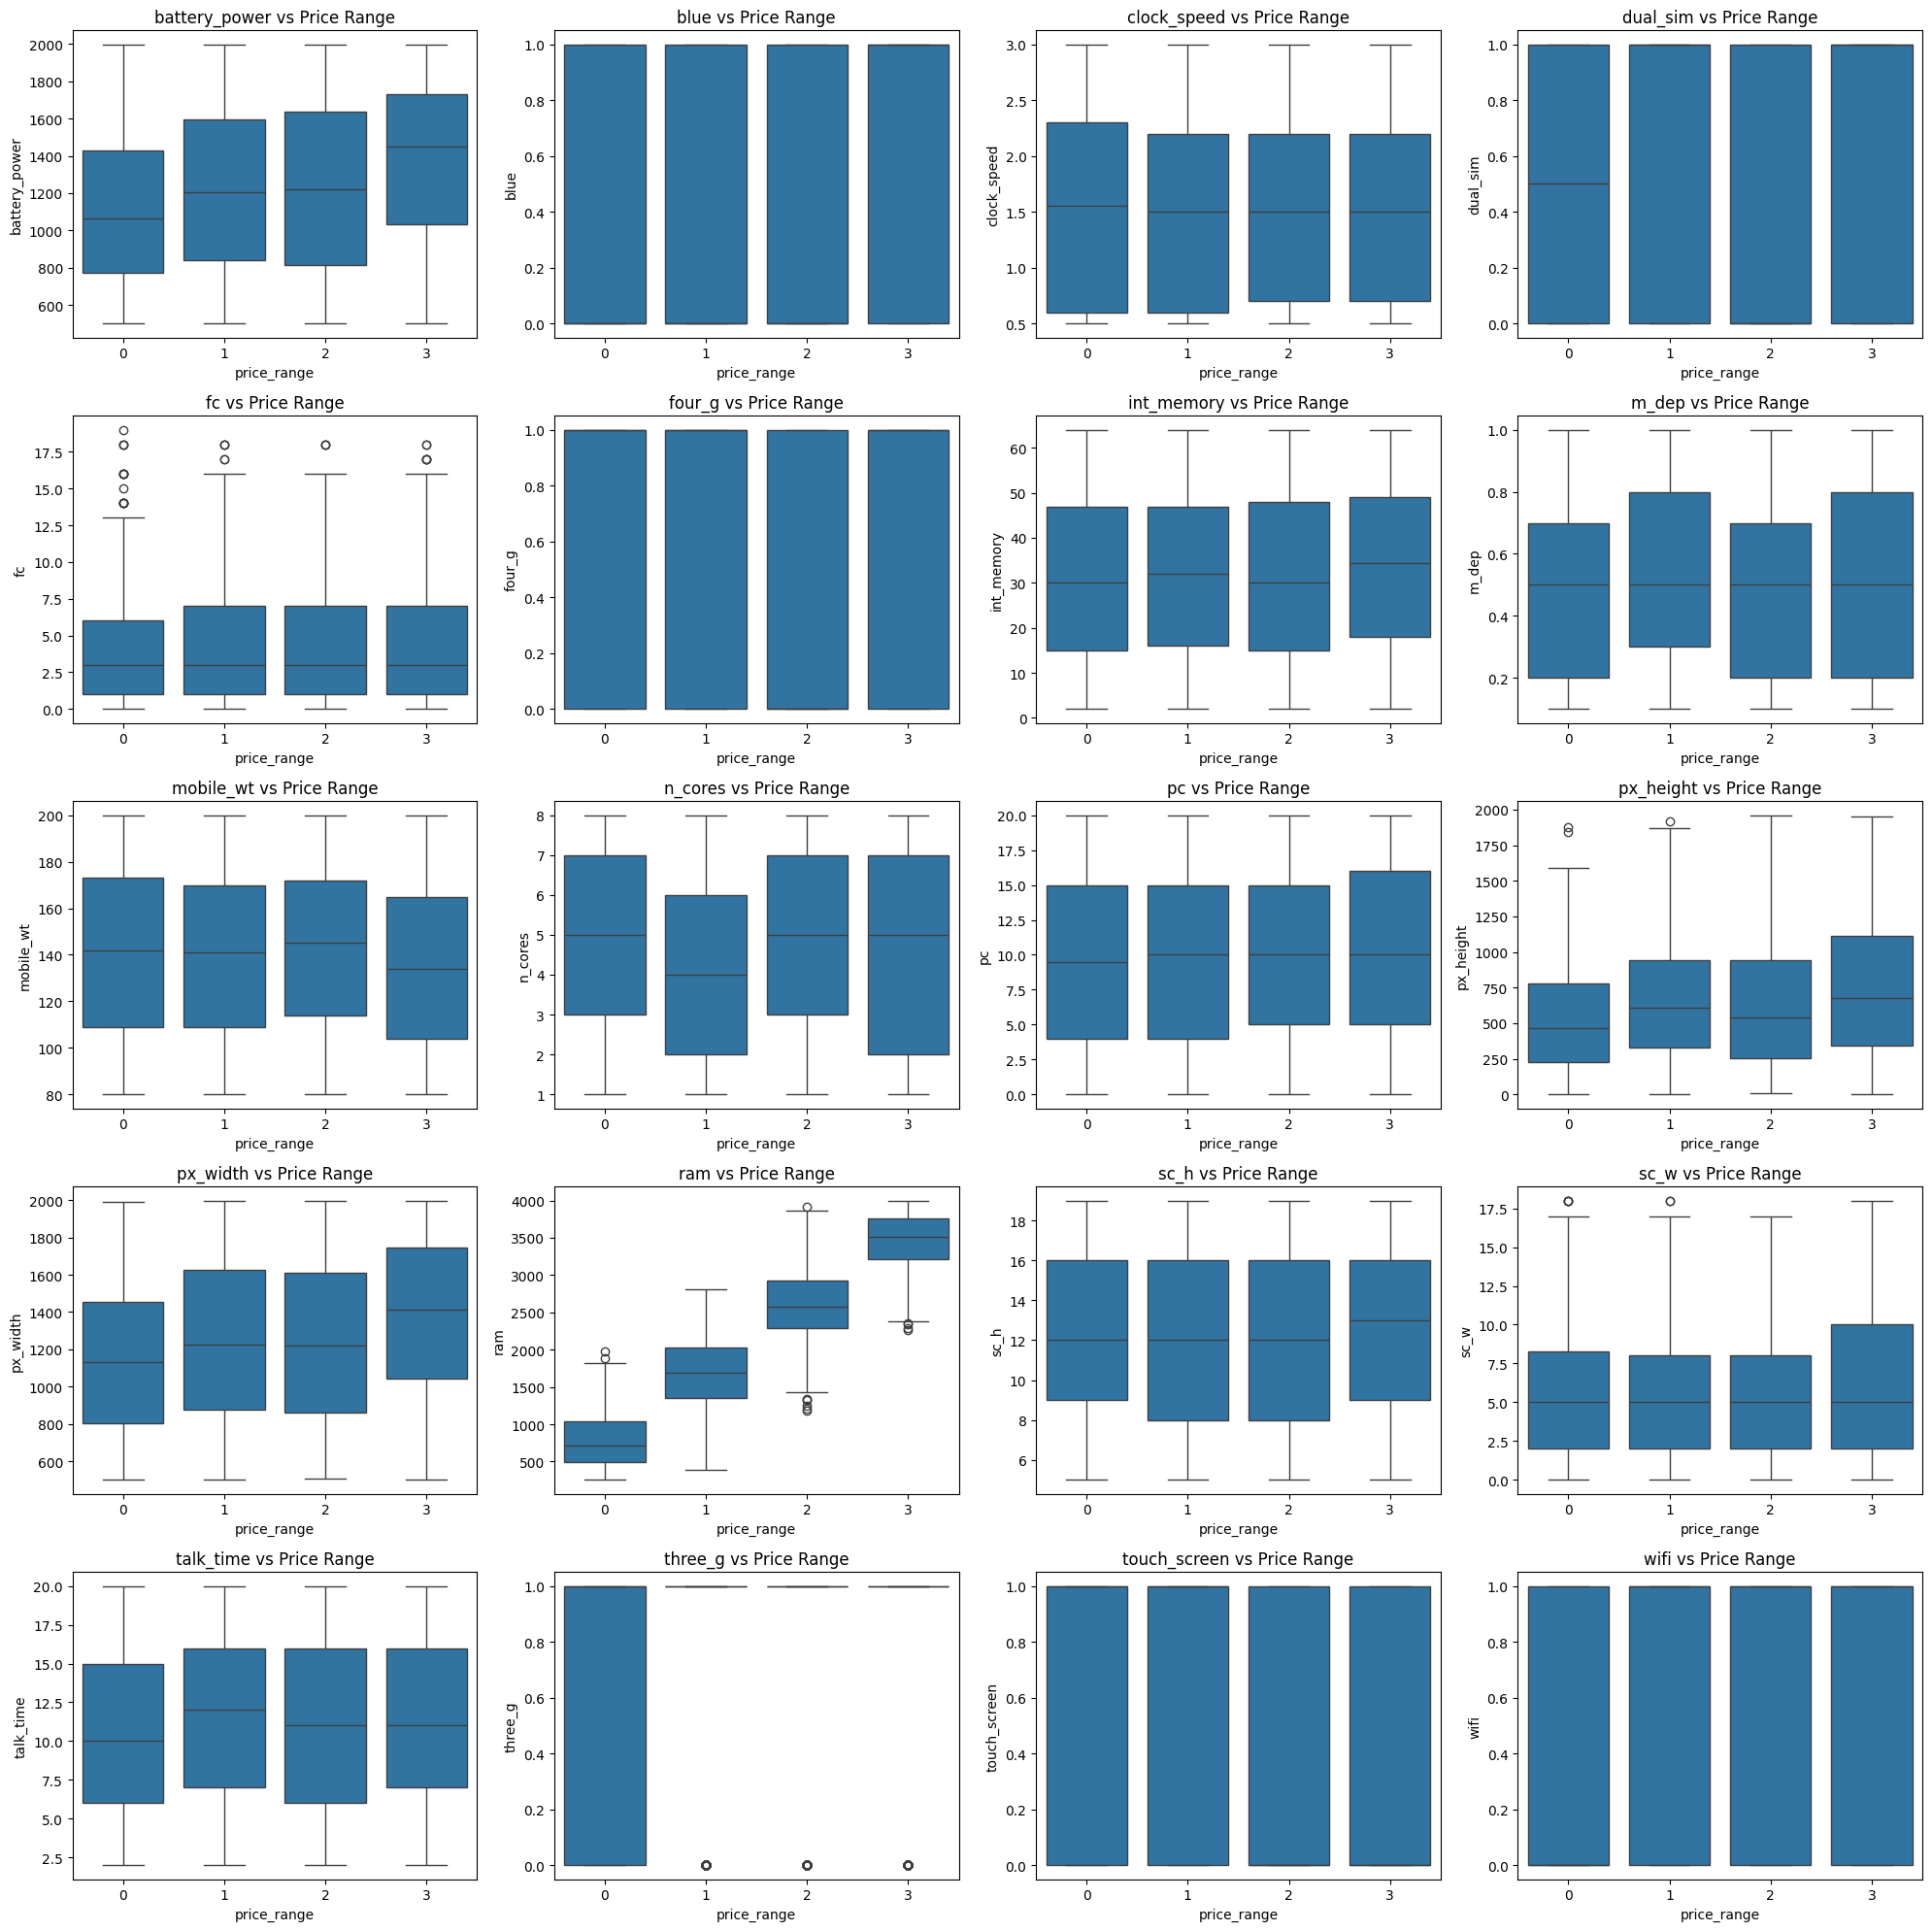

In [20]:
# Create subplots
num_features = len(feature_columns)
cols = 4
rows = -(-num_features // cols)  # Ceiling division

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.boxplot(x='price_range', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Price Range')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


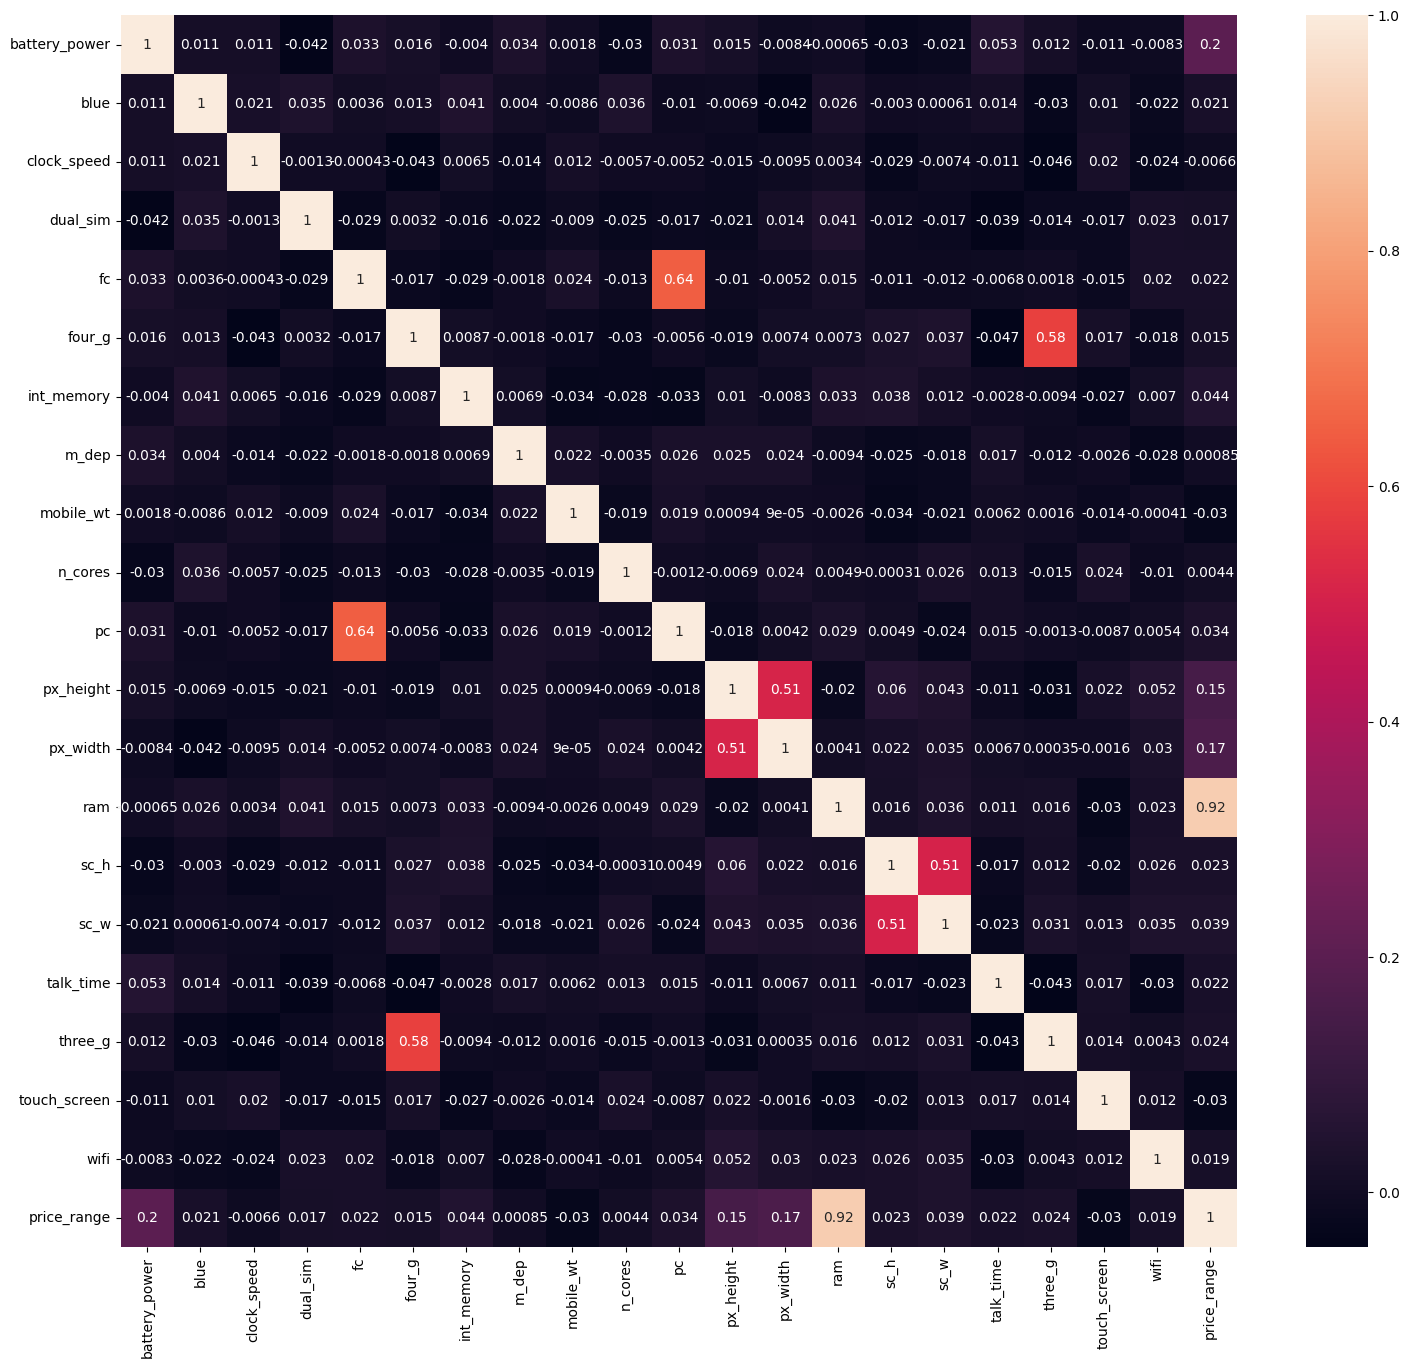

In [24]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
print("X_train: \n",x_train)
print("X_test: \n",x_test)
print("Y_train: \n",y_train)
print("Y_test: \n",y_test)

X_train: 
       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
836             902     1          0.6         1   0       0          63   
575            1197     1          0.5         1   9       0          20   
557            1519     0          2.1         0   0       0          32   
1235           1971     1          0.5         1   0       0          40   
1360            882     0          0.7         1   9       1          28   
...             ...   ...          ...       ...  ..     ...         ...   
1130           1975     1          1.9         1   2       0          31   
1294            589     1          0.5         0   1       1          59   
860            1829     1          0.5         0   0       1          15   
1459           1927     0          0.9         1   3       0          11   
1126            635     1          0.6         1   1       1          50   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  

In [31]:
print("X_train: ",x_train.shape)
print("X_test: ",x_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (1400, 20)
X_test:  (600, 20)
Y_train:  (1400,)
Y_test:  (600,)


In [32]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

acc_knn=accuracy_score(y_test,knn.predict(x_test))
# Accuracy score
print(f"Training Accuracy of KNN is {accuracy_score(y_train,knn.predict(x_train))}")
# Accuracy_score(actual data,predicted data)
print(f"Testing Accuracy of KNN is {accuracy_score(y_test,knn.predict(x_test))}")

# Confusion Matrix
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,knn.predict(x_test))}\n")

# Classification Report
print(f"Classification Report :- \n{classification_report(y_test,knn.predict(x_test))}\n")

Training Accuracy of KNN is 0.9571428571428572
Testing Accuracy of KNN is 0.9183333333333333
Confusion Matrix :- 
[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600




In [33]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

acc_dtc=accuracy_score(y_test,dtc.predict(x_test))
# Accuracy Matrix
print(f" Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train,dtc.predict(x_train))}")
print(f" Testing Accuracy of Decision Tree Classifier is {accuracy_score(y_test,dtc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix : {confusion_matrix(y_test,dtc.predict(x_test))}")

# Classification Report
print(f" Classification Report : {classification_report(y_test,dtc.predict(x_test))}")

 Training Accuracy of Decision Tree Classifier is 1.0
 Testing Accuracy of Decision Tree Classifier is 0.8016666666666666
 Confusion Matrix : [[131  20   0   0]
 [ 16 114  15   1]
 [  0  21 105  22]
 [  0   0  24 131]]
 Classification Report :               precision    recall  f1-score   support

           0       0.89      0.87      0.88       151
           1       0.74      0.78      0.76       146
           2       0.73      0.71      0.72       148
           3       0.85      0.85      0.85       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [34]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

acc_rfc=accuracy_score(y_test,rfc.predict(x_test))
# Accuracy matrix
print(f" Training Accuracy of Random Forest Classifier is {accuracy_score(y_train,rfc.predict(x_train))}")
print(f" Testing Accuracy of Random Forest Classifier is {accuracy_score(y_test,rfc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- {confusion_matrix(y_test,rfc.predict(x_test))}")

# Classification Report
print(f" Classification Report :- {classification_report(y_test,rfc.predict(x_test))}")

 Training Accuracy of Random Forest Classifier is 1.0
 Testing Accuracy of Random Forest Classifier is 0.8683333333333333
 Confusion Matrix :- [[142   9   0   0]
 [ 10 127   9   0]
 [  0  17 115  16]
 [  0   0  18 137]]
 Classification Report :-               precision    recall  f1-score   support

           0       0.93      0.94      0.94       151
           1       0.83      0.87      0.85       146
           2       0.81      0.78      0.79       148
           3       0.90      0.88      0.89       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [35]:
# Ada Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

acc_abc=accuracy_score(y_test,abc.predict(x_test))
# Accuracy Matrix
print(f" Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train,abc.predict(x_train))}")
print(f" Testing Accuracy of Ada Boost Classifier is {accuracy_score(y_test,abc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- {confusion_matrix(y_test,abc.predict(x_test))}")

# Classification Matrix
print(f" Classification Report :- {classification_report(y_test,abc.predict(x_test))}")

C:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 Training Accuracy of Ada Boost Classifier is 0.6114285714285714
 Testing Accuracy of Ada Boost Classifier is 0.5916666666666667
 Confusion Matrix :- [[ 42 109   0   0]
 [  2 131  13   0]
 [  0  35 107   6]
 [  0   1  79  75]]
 Classification Report :-               precision    recall  f1-score   support

           0       0.95      0.28      0.43       151
           1       0.47      0.90      0.62       146
           2       0.54      0.72      0.62       148
           3       0.93      0.48      0.64       155

    accuracy                           0.59       600
   macro avg       0.72      0.60      0.58       600
weighted avg       0.73      0.59      0.58       600



In [36]:
# Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

acc_gbc=accuracy_score(y_test,gbc.predict(x_test))
# Accuracy Score
print(f" Training Accuracy of Gradient Boosting Classifier is { accuracy_score(y_train,gbc.predict(x_train))}")
print(f" Testing Accuracy of Gradient Boosting Classifier is { accuracy_score(y_test,gbc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- { confusion_matrix(y_test,gbc.predict(x_test))}")

# Classification Report
print(f" Classification Report :- { classification_report(y_test,gbc.predict(x_test))}")

 Training Accuracy of Gradient Boosting Classifier is 1.0
 Testing Accuracy of Gradient Boosting Classifier is 0.8866666666666667
 Confusion Matrix :- [[141  10   0   0]
 [  7 129  10   0]
 [  0  13 122  13]
 [  0   0  15 140]]
 Classification Report :-               precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [37]:
# Model Comparison
models=pd.DataFrame({'Model':['KNN','Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier'], 
                     'Score':[acc_knn,acc_dtc,acc_rfc,acc_abc,acc_gbc]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,KNN,0.918333
4,Gradient Boosting Classifier,0.886667
2,Random Forest Classifier,0.868333
1,Decision Tree Classifier,0.801667
3,Ada Boost Classifier,0.591667


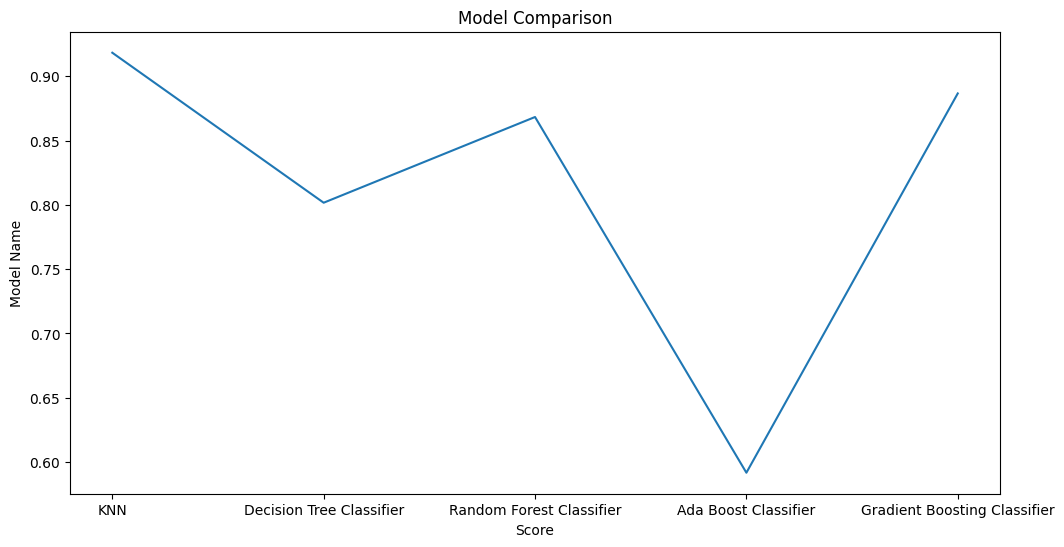

In [38]:
plt.figure(figsize=(12,6))
x=models['Score']
y=models['Model']
plt.plot(y,x)
plt.xlabel("Score")
plt.ylabel("Model Name")
plt.title("Model Comparison")
plt.show()